In [347]:
pip install --upgrade ipykernel


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Parte 1 -  Limpeza e Tratamento de Dados

In [348]:
import pandas as pd


In [349]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [350]:
pd.read_csv('dados_desafio_4.csv').head()


,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTOS,POSSUI CARTAO,ATIVO,SALARIO ANUAL,SAIU
0,1,619,PI,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,PI,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,PI,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


In [351]:
df = pd.read_csv('dados_desafio_4.csv')


### Mostre o tamanho dos dados importados, utilizando o shape.

In [352]:
print("Tamanho original do dataset:", df.shape)


Tamanho original do dataset: (999, 12)


### Altere o nomes das colunas para letras minúsculas

In [353]:
df.columns = df.columns.str.lower()
df.head()


,id,pontos,estado,genero,idade,bens,saldo na conta,produtos,possui cartao,ativo,salario anual,saiu
0,1,619,PI,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,PI,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,PI,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


In [354]:
# Verifica quantidade de valores faltantes por coluna
df.isnull().sum()


id                0
pontos            0
estado            0
genero            8
idade             0
bens              0
saldo na conta    0
produtos          0
possui cartao     0
ativo             0
salario anual     7
saiu              0
dtype: int64

In [355]:
# Ver entradas duplicadas (todas, exceto a primeira ocorrência)
duplicadas = df[df.duplicated()]
print(f"Foram identificadas {duplicadas.shape[0]} entradas duplicadas.")
print(duplicadas)



Foram identificadas 1 entradas duplicadas.
    id  pontos estado    genero  idade  bens  saldo na conta  produtos  \
81  81     665     PI  Feminino     34     1         9664554         2   

    possui cartao  ativo  salario anual  saiu  
81              0      0     17141366.0     0  


### Eliminar os duplicados, para garantir a unicidade.

In [356]:

df.duplicated().sum()
df = df.drop_duplicates()
# Resetando os índices depois de tirar duplicados
df = df.drop_duplicates().reset_index(drop=True)



In [357]:
duplicadas = df[df.duplicated()]
print(f"Foram identificadas {duplicadas.shape[0]} entradas duplicadas.")

Foram identificadas 0 entradas duplicadas.


### Corrigir os dados faltantes  (NANs) e preencher as lacunas com valores adequados.

In [358]:
df['genero'] = df['genero'].fillna(df['genero'].mode())


In [359]:
df['salario anual'] = df['salario anual'].fillna(df['salario anual'].median())


In [360]:
# Preenche colunas numéricas com a média e categóricas com a moda e a média
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


### Explorando colunas categóricas

In [361]:
df['genero'] = df['genero'].str.lower().str.strip()
df['genero'] = df['genero'].replace({'mas': 'masculino', 'fem': 'feminino', 'femin': 'feminino', 'f': 'feminino', 'm': 'masculino'})



In [362]:
# Quantos clientes por genero
# Sexo
print(df['genero'].value_counts())

# Estado
print(df['estado'].value_counts())

# Se saiu do banco (churn)
print(df['saiu'].value_counts())


genero
masculino    535
feminino     463
Name: count, dtype: int64
estado
PI    477
CE    258
MA    257
SP      4
RP      1
MG      1
Name: count, dtype: int64
saiu
0    795
1    203
Name: count, dtype: int64


In [363]:

df.rename(columns={'saldo na conta': 'saldo_na_conta'}, inplace=True)


In [392]:
# Distribuição por Gênero
df.groupby('genero')['id'].count()

genero
feminino     463
masculino    535
Name: id, dtype: int64

In [391]:
df['genero'].value_counts(normalize=True) * 100


genero
masculino    53.607214
feminino     46.392786
Name: proportion, dtype: float64

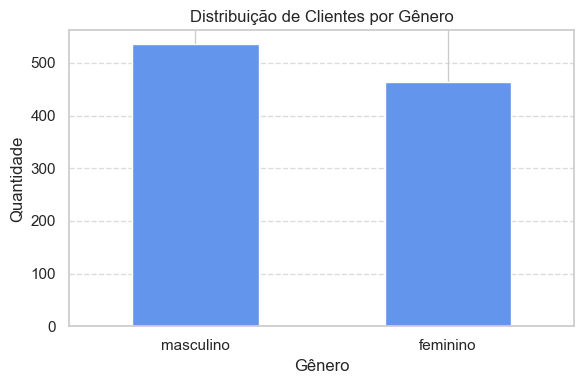

In [388]:
# Contagem por gênero
genero_counts = df['genero'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6, 4))
genero_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Distribuição de Clientes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [364]:
# Usando o groupby, saldo médio por gênero
df.groupby('genero')['saldo_na_conta'].mean()


genero
feminino     7.586319e+06
masculino    6.795575e+06
Name: saldo_na_conta, dtype: float64

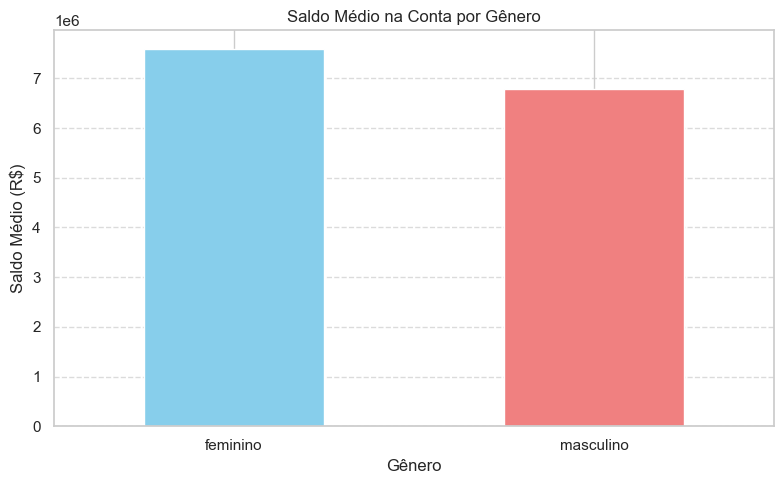

In [382]:

# Calcula o saldo médio por gênero
saldo_genero = df.groupby('genero')['saldo_na_conta'].mean()

# Cria o gráfico
plt.figure(figsize=(8, 5))
saldo_genero.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Saldo Médio na Conta por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Saldo Médio (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibe o gráfico
plt.show()


C:\Users\VAIO\AppData\Local\Temp\ipykernel_6092\3087415831.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='genero', palette='pastel')


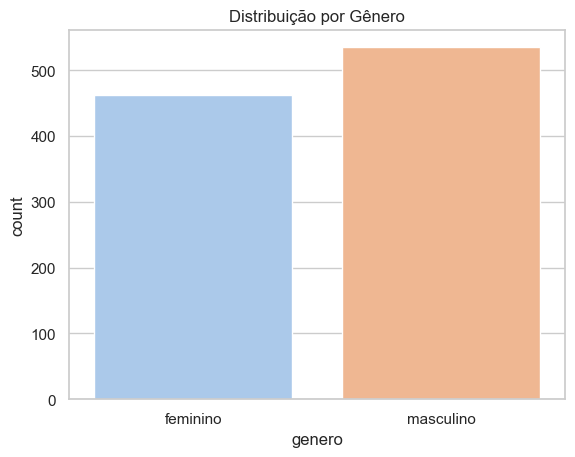

In [365]:
sns.countplot(data=df, x='genero', palette='pastel')
plt.title('Distribuição por Gênero')
plt.show()


In [366]:
#saldo medio por estado
df.groupby('estado')['saldo_na_conta'].mean()


estado
CE    6.322308e+06
MA    1.110829e+07
MG    0.000000e+00
PI    5.464515e+06
RP    0.000000e+00
SP    1.388480e+07
Name: saldo_na_conta, dtype: float64

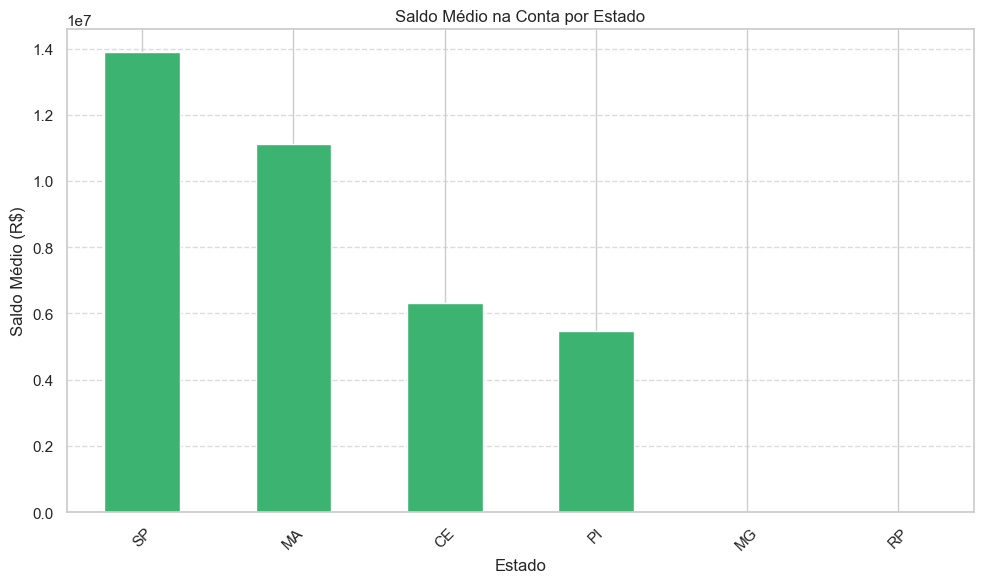

In [383]:
# Saldo médio por estado
saldo_estado = df.groupby('estado')['saldo_na_conta'].mean().sort_values(ascending=False)

# Criando o gráfico
plt.figure(figsize=(10, 6))
saldo_estado.plot(kind='bar', color='mediumseagreen')
plt.title('Saldo Médio na Conta por Estado')
plt.xlabel('Estado')
plt.ylabel('Saldo Médio (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibe o gráfico
plt.show()


C:\Users\VAIO\AppData\Local\Temp\ipykernel_6092\150231522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='estado', order=df['estado'].value_counts().index, palette='viridis')


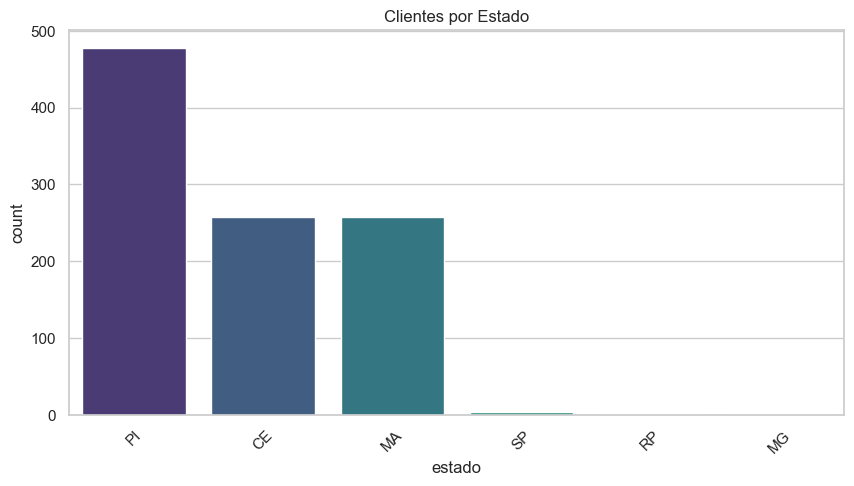

In [367]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='estado', order=df['estado'].value_counts().index, palette='viridis')
plt.title('Clientes por Estado')
plt.xticks(rotation=45)
plt.show()


In [368]:
#Evasão(saida) de clientes por genero
df.groupby(['saiu', 'genero']).size().head()


saiu  genero   
0     feminino     343
      masculino    452
1     feminino     120
      masculino     83
dtype: int64

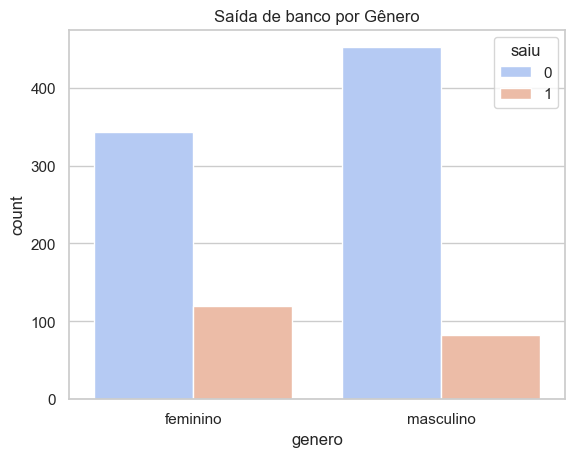

In [369]:
sns.countplot(data=df, x='genero', hue='saiu', palette='coolwarm')
plt.title('Saída de banco por Gênero')
plt.show()


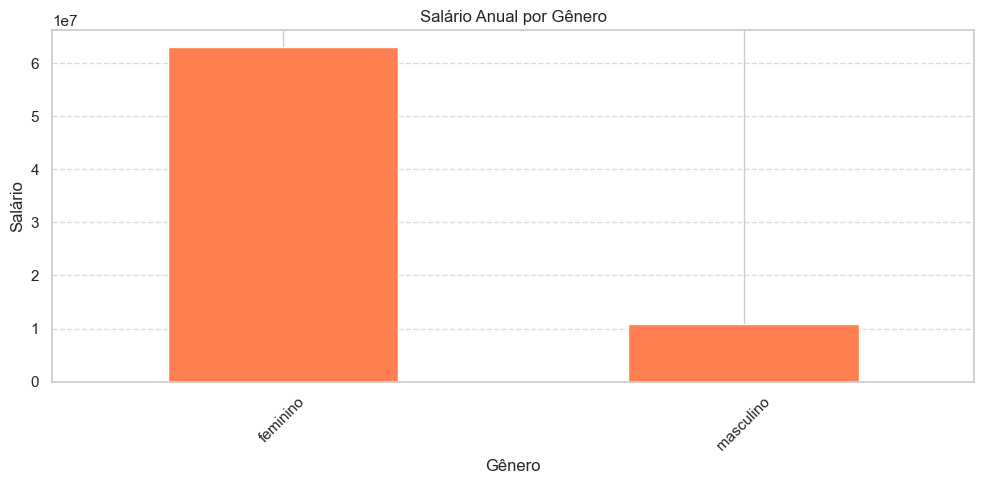

In [370]:
# Evasão por Estado
evasao_estado_genero = df.groupby('genero')['salario anual'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
evasao_estado_genero.plot(kind='bar', figsize=(10,5), color='coral')


plt.title('Salário Anual por Gênero')
plt.ylabel('Salário')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


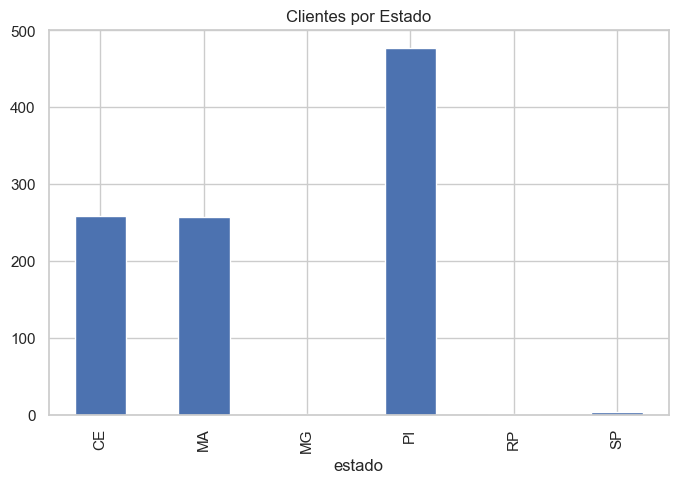

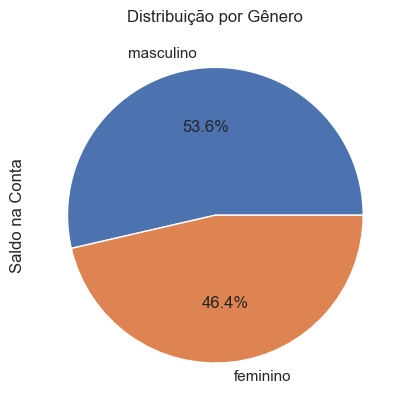

In [381]:
# Distribuição de clientes por estado
df.groupby('estado').size().plot(kind='bar', title='Clientes por Estado', figsize=(8,5))
plt.show()

# Distribuição por sexo
df['genero'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribuição por Gênero')
plt.ylabel('Saldo na Conta')

plt.show()


### Explorando colunas numéricas, utilizando a função describe()

In [372]:

print(df.describe())

                id      pontos       idade        bens  saldo_na_conta  \
count   998.000000  998.000000  998.000000  998.000000    9.980000e+02   
mean    501.337675  648.605210   38.907816    5.073146    7.162423e+06   
std     288.500953   98.312117   11.406570    2.926320    6.314508e+06   
min       1.000000  376.000000  -20.000000    0.000000    0.000000e+00   
25%     252.250000  580.000000   32.000000    2.000000    0.000000e+00   
50%     501.500000  653.000000   37.000000    5.000000    8.926348e+06   
75%     750.750000  721.000000   44.000000    8.000000    1.258767e+07   
max    1000.000000  850.000000  140.000000   10.000000    2.117743e+07   

         produtos  possui cartao      ativo  salario anual        saiu  
count  998.000000     998.000000  998.00000   9.980000e+02  998.000000  
mean     1.526052       0.703407    0.51002   3.511929e+07    0.203407  
std      0.574293       0.456985    0.50015   5.289854e+08    0.402734  
min      1.000000       0.000000    0.000

In [393]:
df[['saldo_na_conta', 'idade', 'patrimonio']].describe()


,saldo_na_conta,idade,patrimonio
count,9.980000e+02,998.000000,998.000000
mean,7.162423e+06,38.907816,5.073146
std,6.314508e+06,11.406570,2.926320
min,0.000000e+00,-20.000000,0.000000
25%,0.000000e+00,32.000000,2.000000
50%,8.926348e+06,37.000000,5.000000
75%,1.258767e+07,44.000000,8.000000
max,2.117743e+07,140.000000,10.000000


### Tratar os outliers, substituindo-os pelos valores adequados e faça um boxplot ou outro gráfico que achar necessário, utilizando as bibliotecas pandas e  seaborn

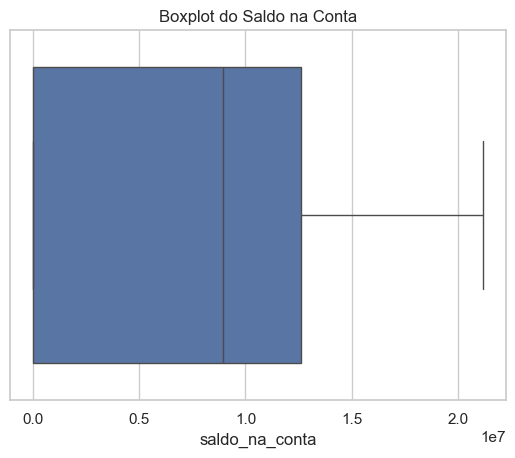

C:\Users\VAIO\AppData\Local\Temp\ipykernel_6092\4081370577.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8926348.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['saldo_na_conta'] < limite_inferior) | (df['saldo_na_conta'] > limite_superior), 'saldo_na_conta'] = mediana_saldo


In [373]:
# Boxplot 
sns.boxplot(data=df, x='saldo_na_conta')
plt.title("Boxplot do Saldo na Conta")
plt.show()

# Tratamento 
Q1 = df['saldo_na_conta'].quantile(0.25)
Q3 = df['saldo_na_conta'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Substituir outliers por média
mediana_saldo = df['saldo_na_conta'].median()
df.loc[(df['saldo_na_conta'] < limite_inferior) | (df['saldo_na_conta'] > limite_superior), 'saldo_na_conta'] = mediana_saldo


## Parte 2  - Estatística

### Apresente a média e a mediana do saldo na conta dos clientes abaixo de 40 anos;

In [374]:
abaixo_40 = df[df['idade'] < 40]
media_abaixo_40 = abaixo_40['saldo_na_conta'].mean()
mediana_abaixo_40 = abaixo_40['saldo_na_conta'].median()

print("Média saldo <40: R$ {:,.2f}".format(media_abaixo_40))
print("Mediana saldo <40: R$ {:,.2f}".format(mediana_abaixo_40))



Média saldo <40: R$ 7,015,427.85
Mediana saldo <40: R$ 8,229,382.00


### Apresente a média e a mediana do saldo na conta dos clientes acima de 40 anos;

In [375]:
acima_40 = df[df['idade'] >= 40]
media_acima_40 = acima_40['saldo_na_conta'].mean()
mediana_acima_40 = acima_40['saldo_na_conta'].median()

print("Média do saldo >=40: R$ {:,.2f}".format(media_acima_40))
print("Mediana do saldo >=40: R$ {:,.2f}".format(mediana_acima_40))


Média do saldo >=40: R$ 7,381,265.97
Mediana do saldo >=40: R$ 9,731,825.00


### Apresente a média e a mediana do saldo na conta dos clientes que saíram e dos que permaneceram;

In [376]:
df.rename(columns={'bens': 'patrimonio'}, inplace=True)
df


,id,pontos,estado,genero,idade,patrimonio,saldo_na_conta,produtos,possui cartao,ativo,salario anual,saiu
0,1,619,PI,feminino,42,2,0.0,1,1,1,10134888.0,1
1,2,608,CE,feminino,41,1,8380786.0,1,0,1,11254258.0,0
2,3,502,PI,feminino,42,8,1596608.0,3,1,0,11393157.0,1
3,4,699,PI,feminino,39,1,0.0,2,0,0,9382663.0,0
4,5,850,CE,feminino,43,2,12551082.0,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,996,838,CE,masculino,43,9,12310588.0,2,1,0,14576583.0,0
994,997,610,CE,masculino,29,9,0.0,3,0,1,8391224.0,0
995,998,811,CE,masculino,44,3,0.0,2,0,1,7843973.0,0
996,999,587,CE,masculino,62,7,12128627.0,1,0,1,677692.0,0


In [377]:
# Separando os grupos
saiu = df[df['saiu'] == 1]
ficou = df[df['saiu'] == 0]

# Média e mediana do saldo na conta - quem saiu
media_saiu = saiu['saldo_na_conta'].mean()
mediana_saiu = saiu['saldo_na_conta'].median()

# Média e mediana do saldo na conta - quem ficou
media_ficou = ficou['saldo_na_conta'].mean()
mediana_ficou = ficou['saldo_na_conta'].median()


print("Clientes que saíram:")
print(f"Média do saldo na conta: R$ {media_saiu:,.2f}")
print(f"Mediana do saldo na conta: R$ {mediana_saiu:,.2f}\n")

print("Clientes que permaneceram:")
print(f"Média do saldo na conta: R$ {media_ficou:,.2f}")
print(f"Mediana do saldo na conta: R$ {mediana_ficou:,.2f}")



Clientes que saíram:
Média do saldo na conta: R$ 8,523,988.16
Mediana do saldo na conta: R$ 10,843,187.00

Clientes que permaneceram:
Média do saldo na conta: R$ 6,814,752.81
Mediana do saldo na conta: R$ 8,061,393.00


### Dos que saíram, mostre qual é o público predominante (Masculino ou Feminino), a idade, o saldo na conta, patrimônio e os seus respectivos estados;

In [378]:
# Filtra apenas os clientes que saíram
df_saiu = df[df['saiu'] == 1]

# Gênero predominante
genero_predominante = df_saiu['genero'].mode()[0]

# Idade média
idade_media = df_saiu['idade'].mean()

# Saldo médio
saldo_medio = df_saiu['saldo_na_conta'].mean()

# Patrimônio médio
patrimonio_medio = df_saiu['patrimonio'].mean()
patrimonio_mediano = df_saiu['patrimonio'].median()



# Estados com mais evasão
estados_predominantes = df_saiu['estado'].value_counts().head()

# Exibindo resultados
print("Perfil dos Clientes que Saíram:\n")
print(f"Gênero predominante: {genero_predominante}")
print(f"Idade média: {idade_media:.1f} anos")
print(f"Saldo médio na conta: R$ {saldo_medio:,.2f}")
print(f"Patrimônio médio: R$ {patrimonio_medio:,.2f}")
print(f"Patrimônio mediano: R$ {patrimonio_mediano:,.2f}")

print("\nEstados com mais evasão:")
print(estados_predominantes)


Perfil dos Clientes que Saíram:

Gênero predominante: feminino
Idade média: 44.5 anos
Saldo médio na conta: R$ 8,523,988.16
Patrimônio médio: R$ 4.73
Patrimônio mediano: R$ 5.00

Estados com mais evasão:
estado
PI    76
MA    75
CE    51
RP     1
Name: count, dtype: int64


C:\Users\VAIO\AppData\Local\Temp\ipykernel_6092\866861582.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_saiu, x='genero', palette='pastel')


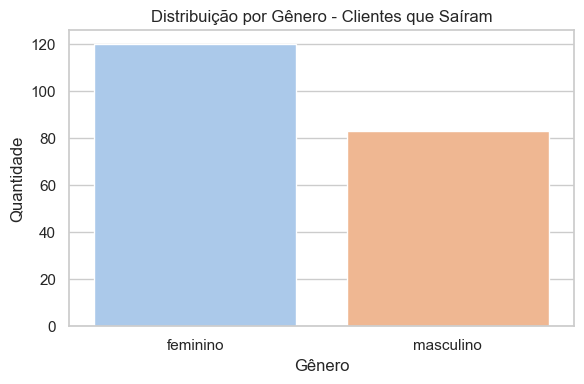

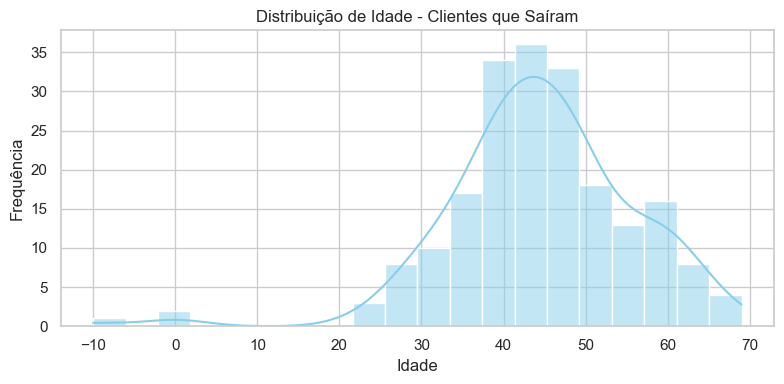

C:\Users\VAIO\AppData\Local\Temp\ipykernel_6092\866861582.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_saiu, x='genero', y='patrimonio', palette='Set2')


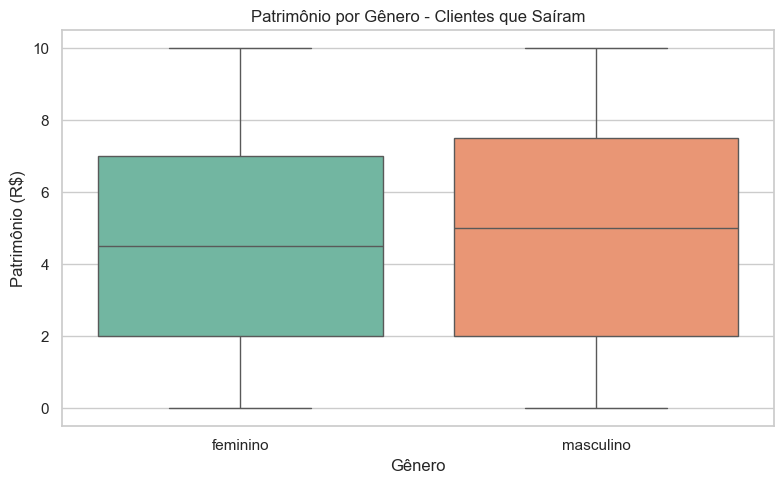

C:\Users\VAIO\AppData\Local\Temp\ipykernel_6092\866861582.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_saiu, x='genero', y='saldo_na_conta', palette='Set3')


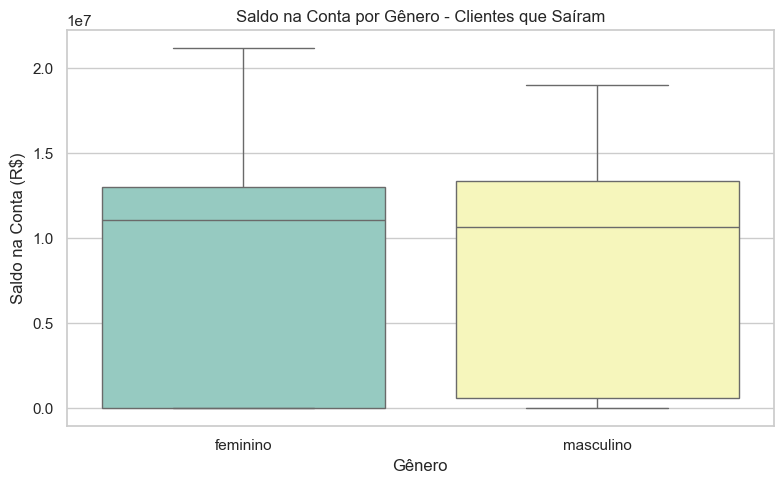

C:\Users\VAIO\AppData\Local\Temp\ipykernel_6092\866861582.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estados_predominantes.index, y=estados_predominantes.values, palette='Blues_d')


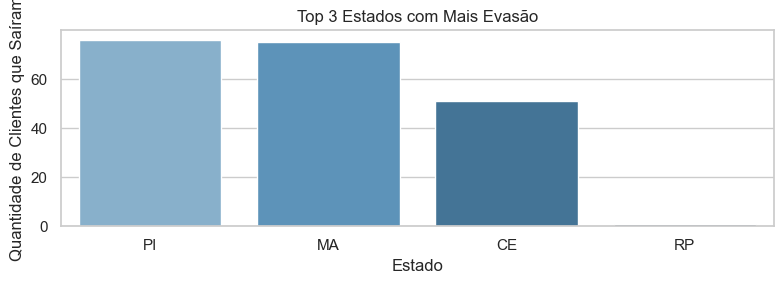

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Filtra apenas os clientes que saíram
df_saiu = df[df['saiu'] == 1]

# Gráfico 1: Distribuição por Gênero
plt.figure(figsize=(6, 4))
sns.countplot(data=df_saiu, x='genero', palette='pastel')
plt.title('Distribuição por Gênero - Clientes que Saíram')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

# Gráfico 2: Distribuição de Idade
plt.figure(figsize=(8, 4))
sns.histplot(df_saiu['idade'], kde=True, bins=20, color='skyblue')
plt.title('Distribuição de Idade - Clientes que Saíram')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Gráfico 3: Boxplot do Patrimônio por Gênero
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_saiu, x='genero', y='patrimonio', palette='Set2')
plt.title('Patrimônio por Gênero - Clientes que Saíram')
plt.xlabel('Gênero')
plt.ylabel('Patrimônio (R$)')
plt.tight_layout()
plt.show()

# Gráfico 4: Saldo na Conta por Gênero
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_saiu, x='genero', y='saldo_na_conta', palette='Set3')
plt.title('Saldo na Conta por Gênero - Clientes que Saíram')
plt.xlabel('Gênero')
plt.ylabel('Saldo na Conta (R$)')
plt.tight_layout()
plt.show()

# Gráfico 5: Estados com Mais Evasão
plt.figure(figsize=(8, 3))
estados_predominantes = df_saiu['estado'].value_counts().head()
sns.barplot(x=estados_predominantes.index, y=estados_predominantes.values, palette='Blues_d')
plt.title('Top 3 Estados com Mais Evasão')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Clientes que Saíram')
plt.tight_layout()
plt.show()
